In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [29]:
data = pd.read_csv('G:/CDO/狗熊会机器学习/TASK6--刘嘉玲/DataClear.csv')

# 将各个词汇的使用频数转换为0-1，0表示未出现某个词汇，而1表示出现了某个词汇
data.iloc[:, 1:] = np.where(data.iloc[:, 1:]>=1, 1, 0)

institution_name = data['单位名称'].unique()  
institution_dict = dict(zip(institution_name, range(len(institution_name))))
f = lambda x: institution_dict[x]
data['单位名称'] = data['单位名称'].apply(f)

X = data.iloc[:, 1:].values
y = data['单位名称'].values 

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 6235), (400, 6235), (1600,), (400,))

In [30]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_pred = MNB.predict(X_test)
y_pred 

array([3, 3, 2, 3, 1, 5, 0, 5, 5, 3, 5, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2,
       1, 3, 2, 1, 1, 3, 3, 3, 1, 3, 5, 5, 0, 0, 2, 5, 2, 2, 5, 3, 0, 2,
       1, 3, 3, 1, 1, 1, 4, 2, 5, 5, 5, 0, 5, 4, 5, 0, 2, 0, 1, 2, 5, 1,
       5, 5, 1, 2, 5, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 2, 0, 5, 1, 0, 1, 1,
       0, 4, 1, 5, 3, 1, 3, 0, 0, 3, 5, 5, 5, 0, 1, 1, 0, 3, 5, 5, 0, 1,
       2, 2, 5, 0, 3, 1, 3, 1, 0, 1, 0, 0, 5, 1, 1, 3, 6, 3, 1, 2, 0, 2,
       5, 2, 5, 0, 0, 1, 3, 6, 5, 1, 4, 6, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 0, 0, 3, 5, 0, 3, 1, 0, 0, 3, 1, 0, 1, 0, 3, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 5, 0, 1, 2, 0, 3, 1, 1, 1, 1, 1, 3, 2, 5,
       1, 5, 1, 0, 3, 1, 2, 1, 4, 0, 0, 3, 5, 2, 5, 1, 1, 2, 0, 6, 0, 3,
       1, 2, 2, 0, 1, 1, 1, 1, 1, 5, 1, 5, 0, 1, 5, 3, 1, 0, 3, 3, 5, 0,
       5, 4, 1, 6, 1, 1, 3, 1, 1, 3, 1, 1, 6, 1, 1, 0, 5, 1, 5, 5, 0, 1,
       1, 0, 0, 5, 1, 3, 5, 0, 2, 2, 5, 1, 0, 1, 0, 2, 0, 5, 4, 5, 1, 0,
       6, 6, 0, 0, 5, 0, 5, 5, 1, 5, 2, 0, 6, 2, 5,

In [31]:
confusion_matrix(y_test, y_pred)  #计算混淆矩阵

array([[ 76,   1,   0,   0,   0,   0,   0],
       [  0, 110,   0,   0,   0,   0,   0],
       [  0,   0,  46,   0,   0,   0,   0],
       [  0,   0,   0,  46,   0,   0,   0],
       [  5,   3,   1,   0,   9,   0,   0],
       [  0,   1,   0,   2,   0,  72,   0],
       [  0,   9,   2,   0,   0,   1,  16]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred )   #计算准确率

0.9375

In [3]:
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 生成的数据为 (0, 0)为中心，协方差矩阵为单位阵的高斯分布
# 和(2,2)为中心，协方差为单位阵的高斯分布
cluster_1 = np.random.multivariate_normal([0, 0], np.diag([1, 1]), 50)
cluster_2 = np.random.multivariate_normal([2, 2], np.diag([1, 1]), 50)

label = np.asarray([0]*len(cluster_1) + [1]*len(cluster_2))
LDA_data = np.row_stack([cluster_1, cluster_2])
shuffle_index = np.arange(len(LDA_data))
random.shuffle(shuffle_index)

LDA_data = LDA_data[shuffle_index]
label = label[shuffle_index]

In [4]:
LDA = LinearDiscriminantAnalysis()
result = LDA.fit(LDA_data, label)

In [5]:
print(result.coef_)  # 权重向量

[[1.56963753 2.32190994]]


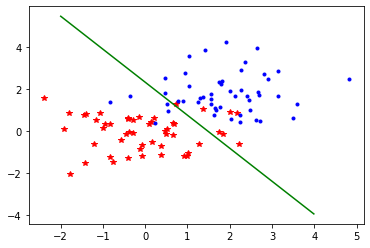

In [6]:
figure = plt.figure(1)

plt.plot(LDA_data[label==0][:, 0], LDA_data[label==0][:, 1], 'r*')
plt.plot(LDA_data[label==1][:, 0], LDA_data[label==1][:, 1], 'b.')

orth_vector = result.coef_.copy()
orth_vector[0][0],  orth_vector[0][1]=orth_vector[0][1],  -orth_vector[0][0]

x_axis = np.arange(-2, 4, 0.01)
x_stack = np.column_stack([np.ones((len(x_axis))), x_axis])
plt.plot(x_axis, x_stack.dot(orth_vector.T), 'g-')
plt.show()